<a href="https://colab.research.google.com/github/ArtemDorofeev/IT-education-project/blob/main/%D0%A1%D1%82%D0%B0%D1%82%D0%B8%D1%81%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B8%D0%B9_%D0%B0%D0%BD%D0%B0%D0%BB%D0%B8%D0%B7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Загрузка данных и подключение библиотек

In [ ]:
# # Подключаем загрузку файла датасета с Гугл Диска и нужные библиотеки

!gdown --id 1djl09wsFTZOzYORDXbm5easK0ELzndAP
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import scipy.stats as stats
import seaborn as sns
import sklearn.linear_model as lm
import statsmodels.api as sm
import statsmodels.formula.api as smf

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1djl09wsFTZOzYORDXbm5easK0ELzndAP
To: /content/data_statistics.xlsx
100% 5.60M/5.60M [00:00<00:00, 238MB/s]


In [ ]:
# Записываем подгруженный файл excel в датафрейм, выводим структуру

dataset = pd.read_excel('data_statistics.xlsx')
dataset.head()

,Unnamed: 0,name,area_city,salary_from,salary_to,salary_mean,experience_name,key_skills_list,spec_skills_list
0,0,Младший специалист ручного тестирования,Астрахань,NaN,NaN,NaN,Нет опыта,[],"['Начальный уровень, Мало опыта', 'Тестировани..."
1,1,Тестировщик.Net,Астрахань,21750.0,43500.0,32625.0,От 1 года до 3 лет,"['Git', 'SQL', 'Тестирование', 'C#', 'API']","['Программирование, Разработка', 'Инженер', 'Т..."
2,2,Пентестер,Астрахань,NaN,NaN,NaN,От 3 до 6 лет,"['SQL', 'Linux', 'Информационная безопасность'...","['Программирование, Разработка', 'Инженер', 'Т..."
3,3,Ведущий Специалист по информационным технологиям,Астрахань,22620.0,NaN,22620.0,Нет опыта,"['Пользователь ПК', 'Работа в команде', '1С: П...","['Компьютерная безопасность', 'Сетевые техноло..."
4,4,Специалист по защите информации,Астрахань,20000.0,20000.0,20000.0,Нет опыта,"['MS Dos', 'Диагностика ПК', 'Компьютер', 'Раб...","['Компьютерная безопасность', 'Сетевые техноло..."


In [ ]:
# Информация о датасете

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51829 entries, 0 to 51828
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        51829 non-null  int64  
 1   name              51829 non-null  object 
 2   area_city         51829 non-null  object 
 3   salary_from       21173 non-null  float64
 4   salary_to         12471 non-null  float64
 5   salary_mean       23751 non-null  float64
 6   experience_name   51829 non-null  object 
 7   key_skills_list   51829 non-null  object 
 8   spec_skills_list  51829 non-null  object 
dtypes: float64(3), int64(1), object(5)
memory usage: 3.6+ MB


# 1. Структурируем данные в виде таблицы "объект-свойство"

In [ ]:
# Проверим тип данных в свернутых столбцах 

print(type(dataset['key_skills_list'][2]))
print(type(dataset['spec_skills_list'][2]))
print(dataset['key_skills_list'][2])
print(dataset['spec_skills_list'][2])

<class 'str'>
<class 'str'>
['SQL', 'Linux', 'Информационная безопасность', 'Работа с базами данных', 'Базы данных']
['Программирование, Разработка', 'Инженер', 'Тестирование']


In [ ]:
# Преобразуем строковый тип данных в списки

def str_list(n):
  try:
    n = eval(n)
    return n
  except:
    return np.nan 

dataset['key_skills_list'] = dataset['key_skills_list'].apply(str_list)
dataset['spec_skills_list'] = dataset['spec_skills_list'].apply(str_list)

In [ ]:
print(type(dataset['key_skills_list'][2]))
print(type(dataset['spec_skills_list'][2]))

<class 'list'>
<class 'list'>


In [ ]:
# Убираем пропуски и нулевые значения 

dataset = dataset[dataset['salary_mean'].notna()]
dataset = dataset[dataset.key_skills_list.astype(bool)]

In [ ]:
dataset.isna().sum()

Unnamed: 0             0
name                   0
area_city              0
salary_from         2137
salary_to           8695
salary_mean            0
experience_name        0
key_skills_list        0
spec_skills_list       0
dtype: int64

In [ ]:
dataset.columns

Index(['Unnamed: 0', 'name', 'area_city', 'salary_from', 'salary_to',
       'salary_mean', 'experience_name', 'key_skills_list',
       'spec_skills_list'],
      dtype='object')

In [ ]:
# Соберем итоговы датасет для анализа в виде "объект-свойство"

df = dataset[['name', 'area_city', 'salary_from', 'salary_to', 'salary_mean', 'experience_name', 'key_skills_list', 'spec_skills_list']]
df.sample(3)

,name,area_city,salary_from,salary_to,salary_mean,experience_name,key_skills_list,spec_skills_list
6602,3D-дизайнер,Уфа,30000.0,NaN,30000.0,Нет опыта,"[Blender 3D, Unity, C#, VR, 3D]","[Игровое ПО, Программирование, Разработка, Диз..."
15961,Менеджер проекта,Москва,50000.0,NaN,50000.0,От 1 года до 3 лет,"[Управление персоналом, Организаторские навыки...","[Программирование, Разработка, Системы управле..."
31466,Компьютерный мастер,Белгород,70000.0,NaN,70000.0,Нет опыта,"[Ремонт ПК, Активные продажи, Диагностика, Win...","[Начальный уровень, Мало опыта, Системный адми..."


Подготовили таблицу "объект - свойство" из 19271 строк-объектов и 8 столбцов-свойств (название, город, зарплат, опыта работы, ключевых навыков и специальностей вакансии)

# 2. Проанализируем тип данных

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19271 entries, 1 to 51826
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              19271 non-null  object 
 1   area_city         19271 non-null  object 
 2   salary_from       17134 non-null  float64
 3   salary_to         10576 non-null  float64
 4   salary_mean       19271 non-null  float64
 5   experience_name   19271 non-null  object 
 6   key_skills_list   19271 non-null  object 
 7   spec_skills_list  19271 non-null  object 
dtypes: float64(3), object(5)
memory usage: 1.3+ MB


Типы данных для датасета df:

1.   name (наименование вакансии) - категориальный тип
2.   area_city (город размещения вакансии) - категориальный тип
3.   salary_from (зп "от") - количественный тип
4.   salary_to (зп "до") - количественный тип
3.   salary_mean (средняя зп) - количественный тип
4.   experience_name  (требуемый опыт работы) - категориальный тип*
5.   key_skills_list (ключевые навыки) - категориальный тип
6.   spec_skills_list (наименование специальности) - категориальный тип

*можно привести к порядковому

# 3. Визуализируем данные в соответствии с их типом

## 3.1 Гистограмма количественных данных

(-44121.0, 400000.0, 0.0, 6221.25)

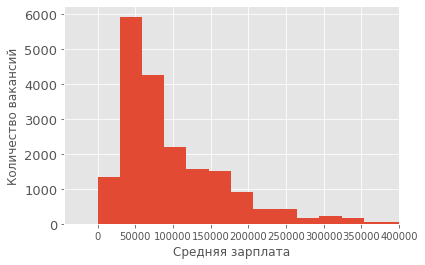

In [ ]:
# Гисторгамма средней заработной платы

plt.style.use('ggplot')
df['salary_mean'].hist(bins=30)
plt.ylabel('Количество вакансий')
plt.xlabel('Средняя зарплата')
plt.axis(xmax= 400000)

## 3.2 Столбчатые диаграммы для категориальных данных

In [ ]:
# ТОП 10 городов вакансий

df['area_city'].value_counts()[:10]

Москва             4592
Санкт-Петербург    2216
Екатеринбург        779
Новосибирск         777
Краснодар           527
Казань              526
Ростов-на-Дону      426
Нижний Новгород     420
Воронеж             341
Самара              322
Name: area_city, dtype: int64

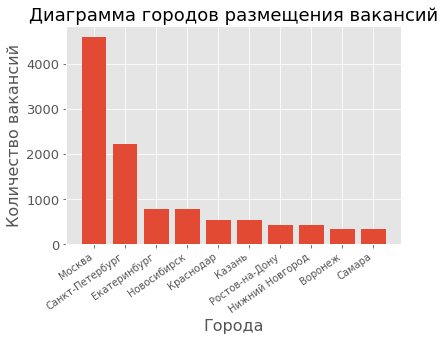

In [ ]:
# Отрисовка столбцовой диаграммы

plt.style.use('ggplot')
plt.bar(df['area_city'].value_counts()[:10].index, df['area_city'].value_counts()[:10].values)
plt.title('Диаграмма городов размещения вакансий', fontsize=18)
plt.xlabel('Города', fontsize=16)
plt.ylabel('Количество вакансий', fontsize=16)
plt.xticks(rotation=35, ha='right')
plt.show()

In [ ]:
# ТОП 10 специальностей

dexpl = df.explode('spec_skills_list')
dexpl['spec_skills_list'].value_counts()[:10]

Инженер                                  12491
Программирование, Разработка              9415
Системы управления предприятием (ERP)     7471
Web мастер                                6061
Web инженер                               6059
Системный администратор                   5916
Поддержка, Helpdesk                       5898
Интернет                                  5008
Аналитик                                  4351
Сетевые технологии                        3854
Name: spec_skills_list, dtype: int64

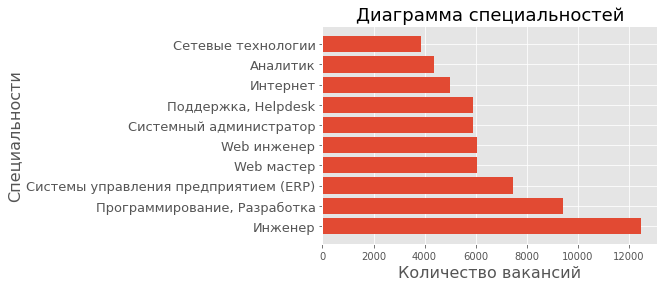

In [ ]:
# Отрисовка столбцовой диаграммы

plt.style.use('ggplot')
plt.barh(dexpl['spec_skills_list'].value_counts()[:10].index, dexpl['spec_skills_list'].value_counts()[:10].values)
plt.title('Диаграмма специальностей', fontsize=18)
plt.xlabel('Количество вакансий', fontsize=16)
plt.ylabel('Специальности', fontsize=16)
plt.show()

In [ ]:
# ТОП 10 ключевых навыков

dexplod = df.explode('key_skills_list')
dexplod['key_skills_list'].value_counts()[:10]

Работа в команде       2273
Git                    1956
SQL                    1873
Linux                  1784
Грамотная речь         1687
1С программирование    1572
Adobe Photoshop        1385
Английский язык        1360
JavaScript             1346
1С: Предприятие 8      1243
Name: key_skills_list, dtype: int64

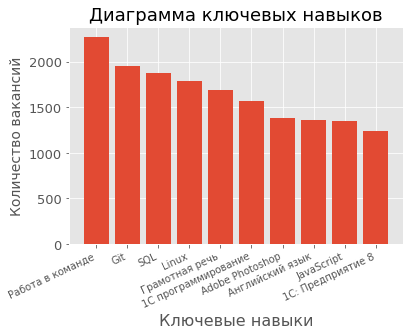

In [ ]:
# Отрисовка столбцовой диаграммы

plt.style.use('ggplot')
plt.bar(dexplod['key_skills_list'].value_counts()[:10].index, dexplod['key_skills_list'].value_counts()[:10].values)
plt.title('Диаграмма ключевых навыков', fontsize=18)
plt.xlabel('Ключевые навыки', fontsize=16)
plt.ylabel('Количество вакансий', fontsize=14)
plt.xticks(rotation=25, ha='right')
plt.show()

## 3.3. Круговые диаграммы для категориальных данных

In [ ]:
# Опыт работы
df['experience_name'].value_counts()

От 1 года до 3 лет    10677
От 3 до 6 лет          5387
Нет опыта              2696
Более 6 лет             511
Name: experience_name, dtype: int64

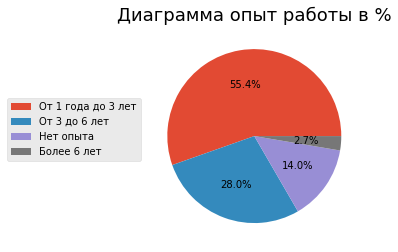

In [ ]:
# Диаграмма распределения опыта работы по вакансиям

plt.style.use('ggplot')
plt.pie(df['experience_name'].value_counts().values, autopct='%.1f%%')
plt.legend(bbox_to_anchor = (-0.25, 0.45, 0.25, 0.25), labels = df['experience_name'].value_counts().index)
plt.title('Диаграмма опыт работы в %', fontsize=18)
plt.show()

# 4. Проверяем гипотезу о нормальном распределении для количественного показателя

## 4.1 Критерий Шапиро_Уилка

In [ ]:
# Проверка нормальности распределения количественной переменной критерием Шапиро-Уйлка

stats.shapiro(df['salary_mean'])

/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.8155683279037476, pvalue=0.0)

## 4.2 Критерии ассиметрии, эксцесса, средне квадратическое отклонение

In [ ]:
df['salary_mean'].describe().astype(int)

count     19271
mean      97448
std       75552
min          30
25%       45000
50%       70000
75%      130000
max      883050
Name: salary_mean, dtype: int64

In [ ]:
df['salary_mean'].std().astype(int)  # Рассчитаем средне квадратическое отклонение

75552

In [ ]:
df['salary_mean'].skew() # Рассчитаем коэффициент асимметрии

2.0289130905009722

In [ ]:
df['salary_mean'].kurtosis() # Рассчитаем коэффициент эксцесса

6.474346598345484

## 4.3 Тест д'Агостино

In [ ]:
# На основании рассчитанных коэффициентов ассиметрии и эксцесса

stats.normaltest(df['salary_mean'])

NormaltestResult(statistic=8332.82425830157, pvalue=0.0)

## ВЫВОД: 
> рассчитав критерий Шапиро-Уилка плучили значение p-value ниже уровня значимости.
Дополнительно посчитав коэффициенты ассиметрии и эксцесса делаем вывод, что распределение количественного показателя зарплата отлична от нормального

# 5. Оценка связей между показателями

## Анализируем связь количественной с категориальной переменной

> Произведем сравнение 4-х независимых групп опыта работы с количественной категорией ненормального распределения заработной платы. По таблице сравнения групп выбираем критерий Краскала-Уолиса

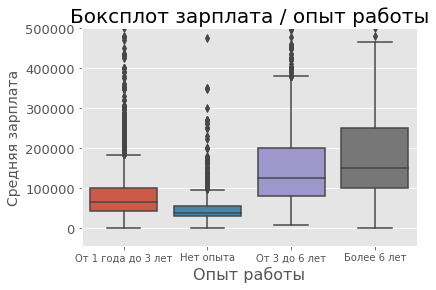

In [ ]:
# Выведем боксплот зависимости зарплаты от опыта работы

plt.style.use('ggplot')
exp = sns.boxplot(x='experience_name', y='salary_mean', data=df)
plt.axis(ymax=500000)
exp.axes.set_title('Боксплот зарплата / опыт работы' , fontsize=20)
exp.set_xlabel('Опыт работы', fontsize=16)
exp.set_ylabel('Средняя зарплата', fontsize=14)
#plt.xticks(rotation=45, ha='right')
plt.show()

In [ ]:
# Рассчитываем критерий Краскала-Уолиса

k_0 = np.array(df[df['experience_name'] == 'Нет опыта']['salary_mean'])
k_1 = np.array(df[df['experience_name'] == 'От 1 года до 3 лет']['salary_mean'])
k_2 = np.array(df[df['experience_name']== 'От 3 до 6 лет']['salary_mean'])
k_3 = np.array(df[df['experience_name']== 'Более 6 лет']['salary_mean'])

stats.mstats.kruskalwallis(k_0, k_1, k_2, k_3)

KruskalResult(statistic=5330.285801644535, pvalue=0.0)

> Отвергаем Н0 гипотезу об отсутствии связи заработной платы с опытом работы. Категориальный признак имеет статистически значимое влияние на ЗП

## Анализируем связь двух категориальных переменных
> Произведем сравнение 3-х независимых групп ключевых навыков с категориальной переменной опыт работы. По таблице сравнения групп выбираем критерий Хи-квадрат

In [ ]:
# Составим списки навыков по группам: программирование, софт-скилы и технологии

lang = ["SQL","Python","JavaScript","PostgreSQL","Java","MS SQL","HTML","MySQL","PHP","C#","CSS","MSVisio","C++","TypeScript","React","HTML5","MS SQL Server","ORACLE"]
soft_skills = ["Английский язык","Работа в команде","Грамотная речь","Аналитическое мышление","Работа с большим объемом информации","Организаторские навыки","Грамотность","Деловая коммуникация","Креативность","Деловая переписка","Ведение переговоров","Деловое общение","Работа в условиях многозадачности","Обучение и развитие","Постановка задач разработчикам","Ориентация на результат","Системное мышление","Удаленная работа","Многозадачность","Продвинутый пользователь ПК"]
tech = ["Linux","Git","Управление проектами","1С программирование","ООП","Информационные технологии","Atlassian Jira","Docker","Информационная безопасность","Настройка сетевых подключений","Разработка технических заданий","Техническая поддержка","Бизнес-анализ","TCP/IP","BPMN","Тестирование","Администрирование","Администрирование сетевого оборудования","REST","Bash","UML","Scrum","XML","Active Directory","Анализ данных","Agile Project Management","Системный анализ","Figma","Работа с базами данных","Kubernetes","Графический дизайн","SMM","iOS","Администрирование серверов Windows","Функциональное тестирование","Atlassian Confluence","Техническое обслуживание","СУБД","Подготовка презентаций","Cisco","Adobe Photoshop","1С: Предприятие","MS PowerPoint","Пользователь ПК","Настройка ПК","Настройка ПО","1С: Документооборот","Windows","Adobe Illustrator","1С: Зарплата и управление персоналом","1С: Управление Торговлей","Ремонт ПК","1С: Бухгалтерия","ERP-системы на базе 1С","1С-Битрикс","Сборка ПК","Spring Framework","CorelDRAW","1С: Управление Производственным Предприятием"]


In [ ]:
# Преобразуем навыки в числовые значения по группам
# 1 - программирование
# 2 - софт скилы
# 3 - технологии
# 4 - Прочие навыки

def sk_group(n):
  if n in lang:
    n = 1
  elif n in soft_skills:
    n = 2
  elif n in tech:
    n = 3
  else:
    n = 4
  return n

dexplod['skills_group'] = dexplod['key_skills_list'].apply(sk_group)
mask_sk4 = dexplod['skills_group'] == 4
dexplod_2 = dexplod[~mask_sk4]
dexplod_2['skills_group'].unique()

array([3, 1, 2])

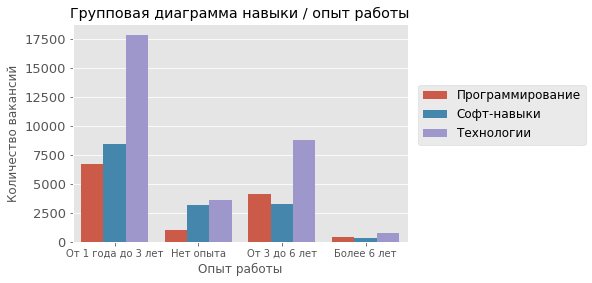

In [ ]:
# Выведем диаграмму комбинаций категорий по опыту работы

plt.style.use('ggplot')
sns.countplot(x=dexplod_2['experience_name'], hue=dexplod_2['skills_group'])
plt.legend(bbox_to_anchor = (1.30, 0.50, 0.25, 0.25), labels = ['Программирование', 'Софт-навыки', 'Технологии'], fontsize=12)
plt.ylabel('Количество вакансий')
plt.xlabel('Опыт работы')
plt.title('Групповая диаграмма навыки / опыт работы')

params = {
          'axes.titlesize': 16,   
          'ytick.labelsize': 13,  
          'axes.labelsize': 14    
          }
plt.rcParams.update(params)

In [ ]:
cross_sk_exp = pd.crosstab(dexplod_2['experience_name'], dexplod_2['skills_group'])
cross_sk_exp

skills_group,1,2,3
experience_name,,,
Более 6 лет,418,359,770
Нет опыта,1045,3184,3593
От 1 года до 3 лет,6680,8448,17881
От 3 до 6 лет,4153,3249,8770


In [ ]:
chi2, prob, dof, expected = scipy.stats.chi2_contingency(cross_sk_exp)
output = "test Statistics: {}\ndegrees of freedom: {}\np-value: {}\n"
 
print(output.format( chi2, dof, prob))

test Statistics: 1385.4246094570494
degrees of freedom: 6
p-value: 3.468951376263859e-296



> По результатам анализа таблицы сопряженности и полученному значению p-value значительно ниже уровня значимости, делаем вывод о наличии зависимости между двумя категориальными признаками. Опыт работы влияет на категории навыков вакансии

## Анализируем связь двух числовых переменных
> Произведем сравнение 2-х числовых переменных: минимальной и маскисмальной зарплаты по каждой вакансии. По таблице сравнения групп выбираем парный коэффициент корреляции Пирсона

In [ ]:
# Уберем пропуски значений

df_salary_full = df[df['salary_from'].notna()]
df_salary_full = df_salary_full[df_salary_full['salary_to'].notna()]

(-29973.75, 629998.75, -86958.0, 950000.0)

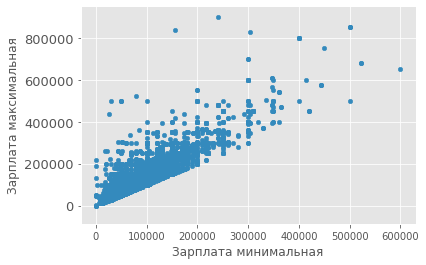

In [ ]:
# Представляем распределение значений на графике

plt.style.use('ggplot')
df_salary_full.plot('salary_from','salary_to',kind="scatter")
plt.ylabel('Зарплата максимальная')
plt.xlabel('Зарплата минимальная')
plt.axis(ymax=950000)

In [ ]:
# Определяем парный коэффициент корреляции Пирсона

df_salary_full[['salary_from','salary_to']].corr()

,salary_from,salary_to
salary_from,1.000000,0.877394
salary_to,0.877394,1.000000


In [ ]:
# Проверяем гипотезу Н0 об отстутствии корреляции статистикой t-стьюдента

scipy.stats.pearsonr(df_salary_full.salary_from, df_salary_full.salary_to)

(0.8773940648749146, 0.0)

> По результатам рассчета коэффициента корреляции Пирсона и значения p-value меньше 0,05 отвергаем нулевую гипотезу об отсутствии корреляции.
Максимальная зарплата имеет прямую корреляцию с минимальной.

# 7. Проверка гипотезы

> Гпотеза Н0: Знание языка программирования SQL не влияет на уровень заработной платы

In [ ]:
dexplod_2

,name,area_city,salary_from,salary_to,salary_mean,experience_name,key_skills_list,spec_skills_list,skills_group
1,Тестировщик.Net,Астрахань,21750.0,43500.0,32625.0,От 1 года до 3 лет,Git,"[Программирование, Разработка, Инженер, Тестир...",3
1,Тестировщик.Net,Астрахань,21750.0,43500.0,32625.0,От 1 года до 3 лет,SQL,"[Программирование, Разработка, Инженер, Тестир...",1
1,Тестировщик.Net,Астрахань,21750.0,43500.0,32625.0,От 1 года до 3 лет,Тестирование,"[Программирование, Разработка, Инженер, Тестир...",3
1,Тестировщик.Net,Астрахань,21750.0,43500.0,32625.0,От 1 года до 3 лет,C#,"[Программирование, Разработка, Инженер, Тестир...",1
3,Ведущий Специалист по информационным технологиям,Астрахань,22620.0,NaN,22620.0,Нет опыта,Пользователь ПК,"[Компьютерная безопасность, Сетевые технологии...",3
...,...,...,...,...,...,...,...,...,...
51825,Программист 1C,Тула,130000.0,NaN,130000.0,От 1 года до 3 лет,1С: Зарплата и управление персоналом,"[Программирование, Разработка, Системы управле...",3
51826,Начальник отдела информационных технологий,Тула,50000.0,NaN,50000.0,От 1 года до 3 лет,Организаторские навыки,"[Информационные технологии, Интернет, Мультиме...",2
51826,Начальник отдела информационных технологий,Тула,50000.0,NaN,50000.0,От 1 года до 3 лет,Работа в команде,"[Информационные технологии, Интернет, Мультиме...",2
51826,Начальник отдела информационных технологий,Тула,50000.0,NaN,50000.0,От 1 года до 3 лет,Деловое общение,"[Информационные технологии, Интернет, Мультиме...",2


In [ ]:
# Разделим вакансии на 2 группы: зо знанием языка программирования SQL и без

dexplod_2['sql_group'] = dexplod_2['key_skills_list'].apply(lambda row: 'sql_yes' if row == 'SQL' else 'sql_no')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
dexplod_2.head()

,name,area_city,salary_from,salary_to,salary_mean,experience_name,key_skills_list,spec_skills_list,skills_group,sql_group
1,Тестировщик.Net,Астрахань,21750.0,43500.0,32625.0,От 1 года до 3 лет,Git,"[Программирование, Разработка, Инженер, Тестир...",3,sql_no
1,Тестировщик.Net,Астрахань,21750.0,43500.0,32625.0,От 1 года до 3 лет,SQL,"[Программирование, Разработка, Инженер, Тестир...",1,sql_yes
1,Тестировщик.Net,Астрахань,21750.0,43500.0,32625.0,От 1 года до 3 лет,Тестирование,"[Программирование, Разработка, Инженер, Тестир...",3,sql_no
1,Тестировщик.Net,Астрахань,21750.0,43500.0,32625.0,От 1 года до 3 лет,C#,"[Программирование, Разработка, Инженер, Тестир...",1,sql_no
3,Ведущий Специалист по информационным технологиям,Астрахань,22620.0,NaN,22620.0,Нет опыта,Пользователь ПК,"[Компьютерная безопасность, Сетевые технологии...",3,sql_no


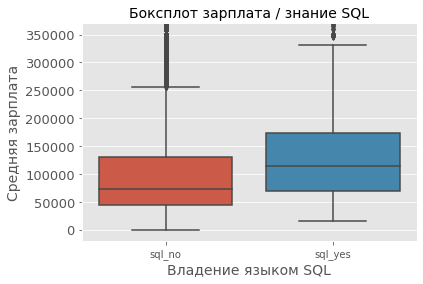

In [ ]:
# Представим графически распределение зарплат по группам

plt.style.use('ggplot')
cit = sns.boxplot(x='sql_group', y='salary_mean', data=dexplod_2)
plt.axis(ymin=-20000, ymax=370000)
cit.axes.set_title('Боксплот зарплата / знание SQL' , fontsize=14)
cit.set_ylabel('Средняя зарплата', fontsize=14)
cit.set_xlabel('Владение языком SQL', fontsize=14)
plt.show()

In [ ]:
# Cоздаем фильтры по группам

d_sqlno = dexplod_2[dexplod_2['sql_group'] == 'sql_no']
d_sqlyes = dexplod_2[dexplod_2['sql_group'] == 'sql_yes']

> Для сравнения 2-х групп количественного признака ненормального распределения используем критерий Манна-Уитни

In [ ]:
# Определяем значение статистики стьюдента p-value

scipy.stats.mannwhitneyu(d_sqlyes['salary_mean'], d_sqlno['salary_mean'])  

MannwhitneyuResult(statistic=67944317.5, pvalue=7.832684607114123e-95)

> По результатам оценки критерием Манна-Уитни отвергаем Н0 гипотезу об отсутствии связи заработной платы с знанием языка программирования SQL. Категориальный признак имеет статистически значимое влияние на ЗП

# **ИТОГ:**
В результате исследования можно сделать следующие выводы:
1. Количественный показатель заработная плата имеет ненормльное распределение
2. Количественный показатель заработная плата имеет взаимосвязь с такими категориальными показателями как: город размещения вакансии, специальность и опыт работы.
3. Количественный показатель заработная плата зависит так же от категории навыков (Знание языков программирования, soft-skill, Стек технологий)
5. По результатам проверки гипотез о влиянии ключевых навыков на уровень зарплаты выяснили:

*   заработная плата зависит от наличия в требованиях к вакансии знания языка программирования SQL

Рекомендации для заказчика:

а) Из проанализированных взаимосвязей между категориями видно, что вакансии с  таким навыком как знание языка программирования SQL ценятся выше, чем без этого навыка.

Поэтому рекомендация для заказчика сосредоточиться на включении в программу обучения языку программирования SQL

б) Также очевидно, что с изменением требуемого опыта специалиста меняется и уровень заработной платы. Можно сделать вывод, что специалисты с опытом, после повышения квалификации, более востребованны, чем специалисы без опыта после переподготовки.

Поэтому выгоднее сосредоточиться на курсах по повышению квалификации

